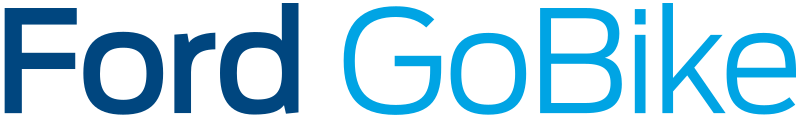

In [2]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Ford_GoBike_logo.svg/800px-Ford_GoBike_logo.svg.png")

### Want to avoid heavy traffics in Bay Area??? Alternative - Walking
### Want a faster way of travelling than walking??? Alternative - Ford GoBike
# StoryTelling with the DashBoards is at the End
### It requires all these cells to run before getting there..
# Importing Libraries
### Please use pip Install cell if it requires downloading of the library 

In [3]:
#!pip install datetime
#!pip install calender
#!pip install geopy

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import vincenty
import numpy as np 
from pandas import DataFrame
import seaborn as sns
from matplotlib.pyplot import figure
import cv2

# Reading & Merging the Datasets

In [5]:
dataset = pd.read_csv('2017-fordgobike-tripdata.csv')

In [6]:
for i in range(1,8):
    dataset1 = pd.read_csv('20180{}-fordgobike-tripdata.csv'.format(i))
    dataset = dataset.append(dataset1)

# Adding the Calcualted fields & Cleaning Data

In [7]:
# Adding new columns with Day of the Week, Year, Month, Day, Hour & Minute
dataset['start_time'] = pd.to_datetime(dataset['start_time'])
dataset['dayofweek'] = dataset['start_time'].dt.weekday_name
dataset['year'] = dataset['start_time'].dt.year
dataset['month'] = dataset['start_time'].dt.month
dataset['day'] = dataset['start_time'].dt.day
dataset['hour'] = dataset['start_time'].dt.hour
dataset['minute'] = dataset['start_time'].dt.minute
dataset['age'] = 2018-dataset['member_birth_year']
dataset['member_gender'] = dataset['member_gender'].fillna(value = 'Unknown')

## Adding Displacement Column - Takes a lot of time (Optional)


In [9]:
# Calculating the closest distance between start station location & end station lication
# This is not the best way find travel distance, but can be used to understand customer behavior to certain extent
dataset['Displacement'] = dataset.apply(
    (lambda row: vincenty(
        (row['start_station_latitude'], row['start_station_longitude']),
        (row['end_station_latitude'], row['end_station_longitude'])
    ).miles),
    axis=1
)

# Number of Rides Per Day

In [10]:
no_of_rides_per_day = pd.DataFrame(dataset.groupby(['year','month','day']).count()['duration_sec'])

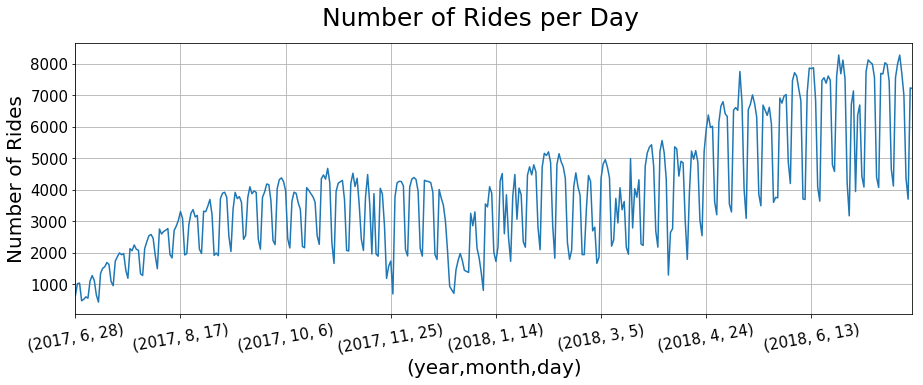

In [11]:
no_of_rides_per_day.plot(kind = 'line',legend = None, figsize = (15,5))
plt.xticks(rotation=10)
plt.tick_params(labelsize=15)
plt.suptitle('Number of Rides per Day', size=25)
plt.ylabel('Number of Rides', size=20)
plt.xlabel('(year,month,day)', size=20)
plt.grid(True)
plt.savefig('Number of Rides per Day.png',bbox_inches='tight')
plt.show()

# Total Duration Per Month

In [12]:
total_duration_per_month = pd.DataFrame(dataset.groupby(['year','month']).sum()['duration_sec'])

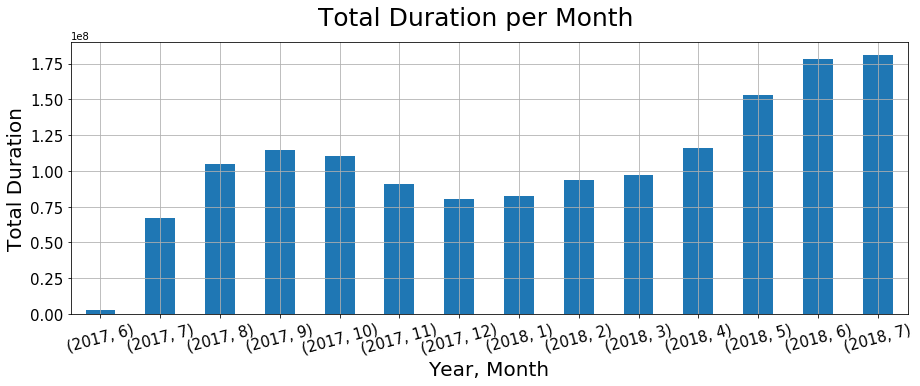

In [13]:
total_duration_per_month.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=15)
plt.tick_params(labelsize=15)
plt.suptitle('Total Duration per Month', size=25)
plt.ylabel('Total Duration', size=20)
plt.xlabel('Year, Month', size=20)
plt.grid(True)
plt.savefig('Total Duration per Month.png',bbox_inches='tight')
plt.show()

# Total Number of Rides by Month

In [14]:
total_no_of_rides_by_month = pd.DataFrame(dataset.groupby(['year','month']).count()['start_station_id'])

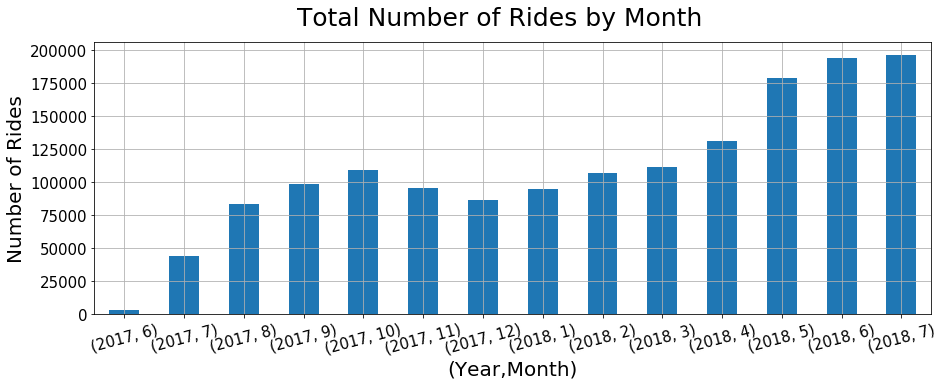

In [15]:
total_no_of_rides_by_month.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=15)
plt.tick_params(labelsize=15)
plt.suptitle('Total Number of Rides by Month', size=25)
plt.ylabel('Number of Rides', size=20)
plt.xlabel('(Year,Month)', size=20)
plt.grid(True)
plt.savefig('Total Number of Rides by Month.png',bbox_inches='tight')
plt.show()

# Trip Duration

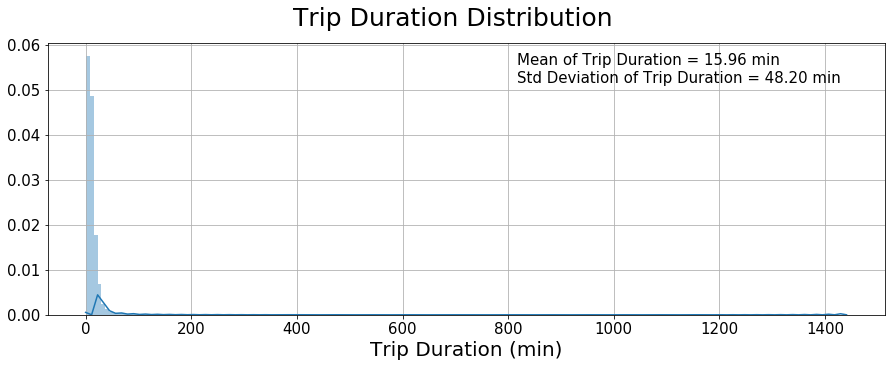

In [82]:
#dataset['duration_sec'].plot(kind='bar')
dataset['duration_min']=dataset['duration_sec']/60
plt.figure(figsize=(15,5))
sns.distplot(dataset['duration_min'], bins = 200)
plt.xticks(rotation=0)
plt.tick_params(labelsize=15)
plt.suptitle('Trip Duration Distribution', size=25)
plt.xlabel('Trip Duration (min)', size=20)
plt.grid(True)
plt.figtext(0.56,0.77, 'Mean of Trip Duration = {:.2f} min\nStd Deviation of Trip Duration = {:.2f} min'.format(dataset['duration_min'].describe()[1], dataset['duration_min'].describe()[2]), size = 15)
plt.savefig('Trip Duration Distribution.png',bbox_inches='tight')
plt.show()

In [17]:
total_num_rides_by_day_of_week = pd.DataFrame(dataset.groupby(['dayofweek']).count()['start_station_id'])

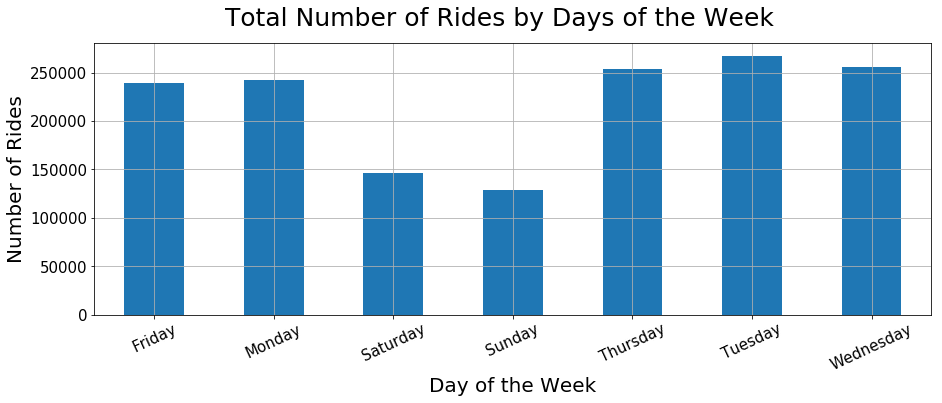

In [18]:
total_num_rides_by_day_of_week.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Total Number of Rides by Days of the Week', size=25)
plt.ylabel('Number of Rides', size=20)
plt.xlabel('Day of the Week', size=20)
plt.grid(True)
plt.savefig('Total Number of Rides by Days of the Week.png',bbox_inches='tight')
plt.show()

# Total Number of Rides by Hour of the Day

In [19]:
total_num_rides_by_hour = pd.DataFrame(dataset.groupby(['hour','minute']).count()['start_station_id'])

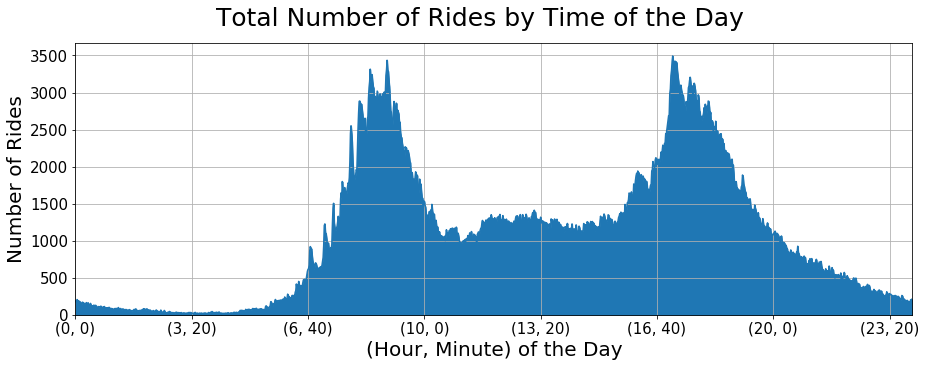

In [20]:
total_num_rides_by_hour.plot(kind = 'area',legend = None, figsize =(15,5))
plt.tick_params(labelsize=15)
plt.suptitle('Total Number of Rides by Time of the Day', size=25)
plt.ylabel('Number of Rides', size=20)
plt.xlabel('(Hour, Minute) of the Day', size=20)
plt.grid(True)
plt.savefig('Total Number of Rides by Time of the Day.png',bbox_inches='tight')
plt.show()

# HeatMap of Time of the Day vs Day of the Week

In [21]:
dataset_with_day_of_week_dummies = pd.get_dummies(dataset, columns = ['dayofweek'])
dataset_with_day_of_week_dummies = dataset_with_day_of_week_dummies[['hour', 'dayofweek_Friday', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday']]

In [22]:
dataset_with_day_of_week_dummies.columns =['hour','Friday', 'Monday', 'Saturday',
                                           'Sunday', 'Thursday', 'Tuesday',
                                           'Wednesday'] 
dataset_with_day_of_week_dummies = pd.DataFrame(dataset_with_day_of_week_dummies.groupby(['hour']).sum()[['Monday', 'Tuesday', 'Wednesday',
                                           'Thursday', 'Friday', 'Saturday',
                                           'Sunday']])
#dataset_with_day_of_week_dummies.columns

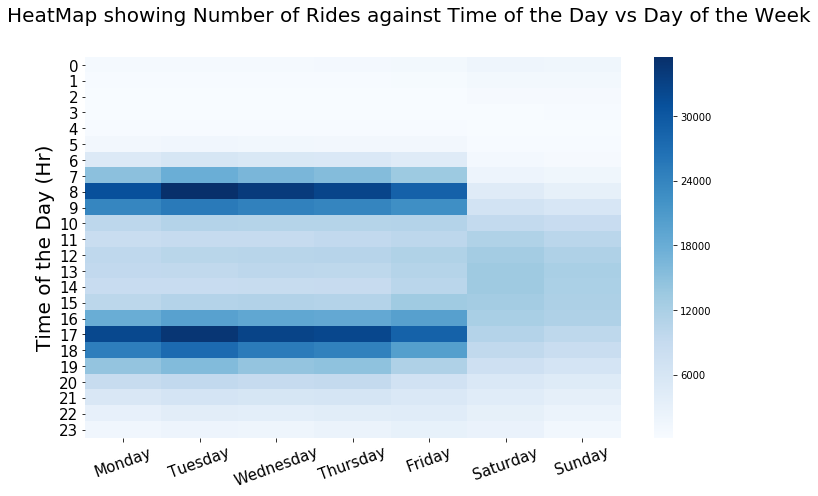

In [23]:
Index= [i for i in range(0,24)]
Cols = dataset_with_day_of_week_dummies.columns

plt.figure(figsize=(12,7))
sns.heatmap(dataset_with_day_of_week_dummies, cmap="Blues")
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.tick_params(labelsize=15)
plt.suptitle('HeatMap showing Number of Rides against Time of the Day vs Day of the Week', size=20)
plt.ylabel('Time of the Day (Hr)', size=20)
plt.savefig('HeatMap.png',bbox_inches='tight')
plt.show()

# Top 20 Start Stations of all time - Busy Stations

In [24]:
total_rides_by_start_station_id = pd.DataFrame(dataset.groupby(['start_station_id']).count()['start_station_name'])

In [25]:
total_rides_by_start_station_id.columns = ['Total_Rides']
total_rides_by_start_station_id = total_rides_by_start_station_id.sort_values(by = ['Total_Rides'],ascending = False).head(20)

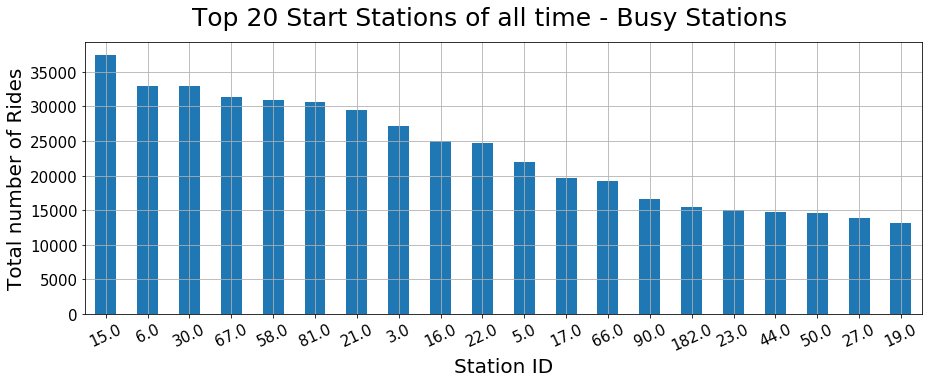

In [26]:
total_rides_by_start_station_id.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Top 20 Start Stations of all time - Busy Stations', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Station ID', size=20)
plt.grid(True)
plt.savefig('Top 20 Start Stations of all time - Busy Stations.png',bbox_inches='tight')
plt.show()

# Top 20 End Stations of all time - Busy Stations

In [27]:
total_rides_by_end_station_id = pd.DataFrame(dataset.groupby(['end_station_id']).count()['end_station_name'])

In [28]:
total_rides_by_end_station_id.columns = ['Total_Rides']
total_rides_by_end_station_id = total_rides_by_end_station_id.sort_values(by = ['Total_Rides'],ascending = False).head(20)

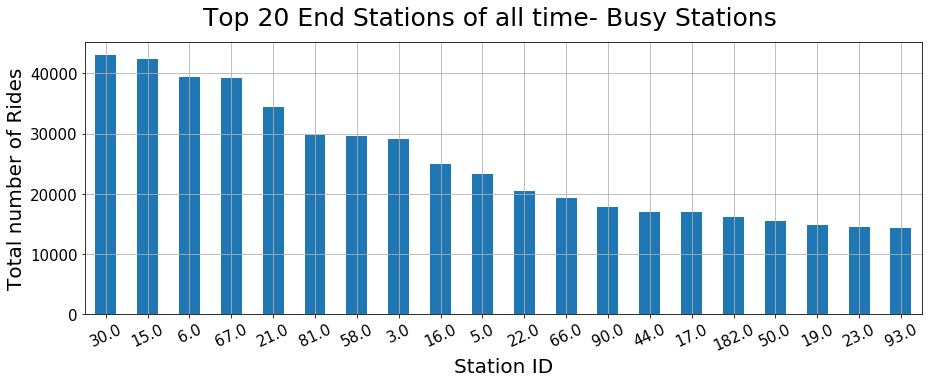

In [29]:
total_rides_by_end_station_id.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Top 20 End Stations of all time- Busy Stations', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Station ID', size=20)
plt.grid(True)
plt.savefig('Top 20 End Stations of all time- Busy Stations.png',bbox_inches='tight')
plt.show()

# Bottom 20 Start Stations of all time - Least Busy Stations

In [30]:
total_rides_by_station_id = pd.DataFrame(dataset.groupby(['start_station_id']).count()['start_station_name'])

In [31]:
total_rides_by_station_id.columns = ['Total_Rides']
total_rides_by_station_id = total_rides_by_station_id.sort_values(by = ['Total_Rides']).head(20)

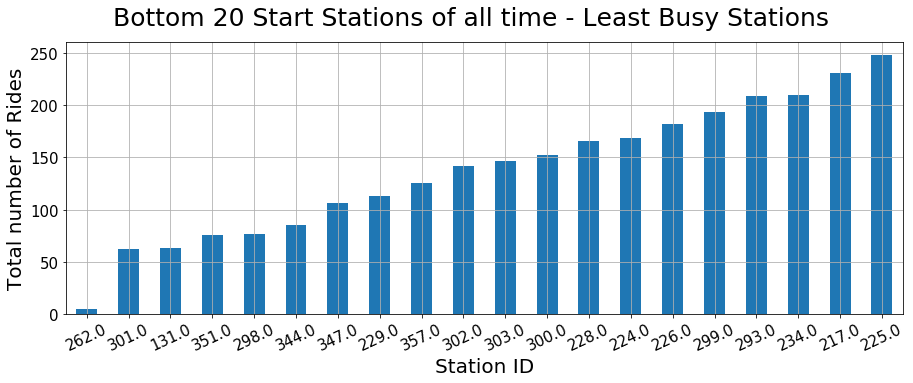

In [91]:
total_rides_by_station_id.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Bottom 20 Start Stations of all time - Least Busy Stations', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Station ID', size=20)
plt.grid(True)
plt.savefig('Bottom 20 Start Stations of all time - Busy Stations.png',bbox_inches='tight')
plt.show()

#  Bottom 20 End Stations of all time - Least Busy Stations

In [33]:
total_rides_by_station_id = pd.DataFrame(dataset.groupby(['end_station_id']).count()['end_station_name'])

In [34]:
total_rides_by_station_id.columns = ['Total_Rides']
total_rides_by_station_id = total_rides_by_station_id.sort_values(by = ['Total_Rides']).head(20)

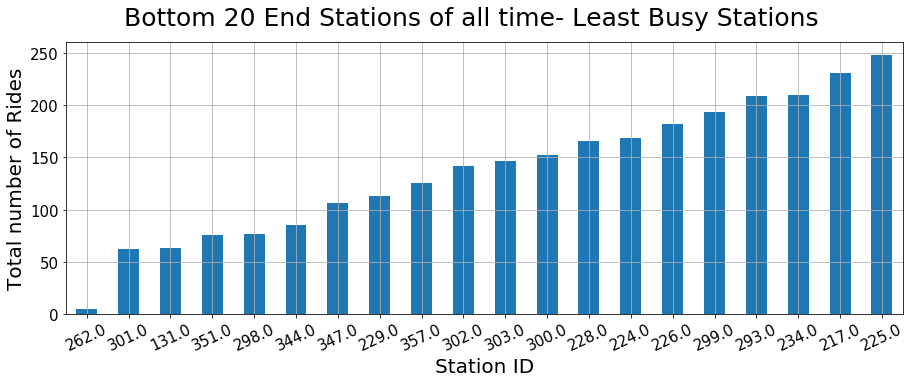

In [92]:
total_rides_by_station_id.plot(kind = 'bar',legend = None, figsize =(15,5))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Bottom 20 End Stations of all time- Least Busy Stations', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Station ID', size=20)
plt.grid(True)
plt.savefig('Bottom 20 End Stations of all time- Busy Stations.png',bbox_inches='tight')
plt.show()

# Top 20 Start Station - End Station Combo

In [36]:
top_combinations = pd.DataFrame(dataset.groupby(['start_station_id', 'end_station_id']).size().reset_index())
top_combinations.columns = ['start_station_id', 'end_station_id', 'Count']
top_combinations = top_combinations.sort_values(by = 'Count', ascending = False).head(20)

In [37]:
top_combinations['combination'] = top_combinations.start_station_id.map(str) +' - '+ top_combinations.end_station_id.map(str)

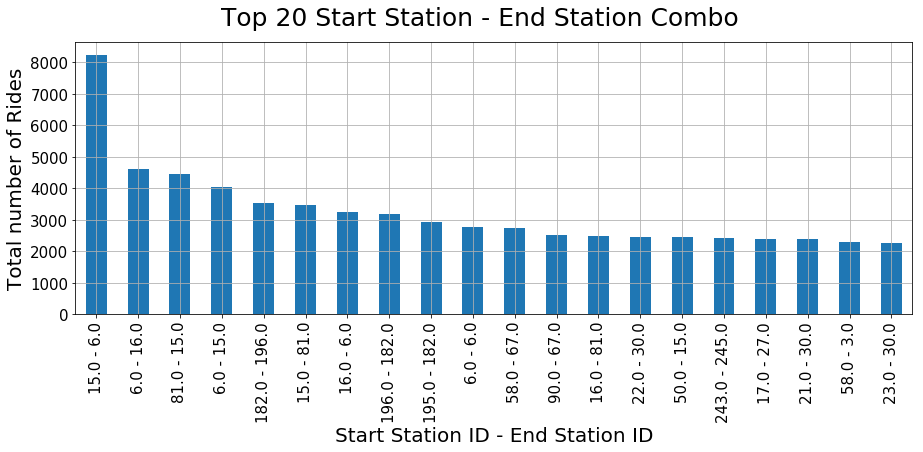

In [38]:
top_combinations.plot(x='combination', y='Count', kind='bar',legend = None, figsize =(15,5)) 
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.suptitle('Top 20 Start Station - End Station Combo', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Start Station ID - End Station ID', size=20)
plt.grid(True)
plt.savefig('Top 20 Start Station - End Station Combo.png',bbox_inches='tight')
plt.show()

# Genderwise User Variation

In [39]:
grouped_gender_df = pd.DataFrame(dataset.groupby(['member_gender']).count()['bike_id'])

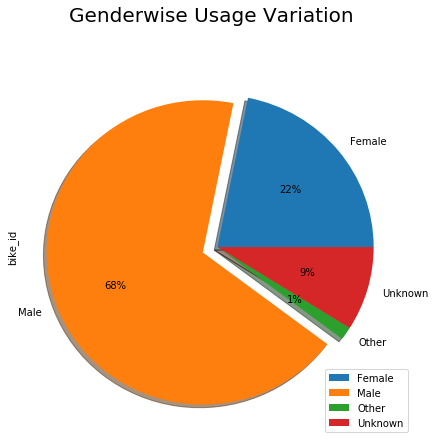

In [40]:
explode = (0, 0.1, 0, 0) 
grouped_gender_df.plot(kind = 'pie', figsize =(7,7), autopct='%1.0f%%', subplots = True, explode = explode, shadow=True, startangle=0)

plt.suptitle('Genderwise Usage Variation', size=20)
plt.savefig('Genderwise Usage Variation.png',bbox_inches='tight')
plt.show()

# Trend of Genderwise Users

In [41]:
trend_gender = pd.DataFrame(dataset.groupby(['year','month','member_gender']).count()['bike_id'])
trend_gender = trend_gender.unstack(level=2)
#trend_gender = trend_gender.fillna(value = 0)
trend_gender = trend_gender['bike_id']

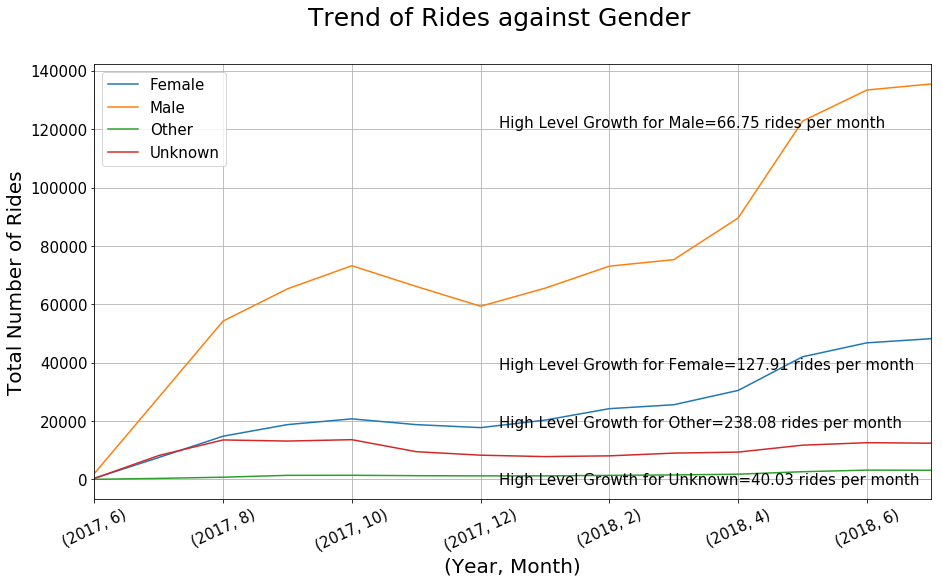

In [42]:
trend_gender.plot(kind = 'line', figsize =(15,8))
plt.xticks(rotation=25)
plt.tick_params(labelsize=15)
plt.suptitle('Trend of Rides against Gender', size=25)
plt.xlabel('(Year, Month)', size=20)
plt.ylabel('Total Number of Rides', size=20)
plt.legend(loc='best', prop={'size':15})
plt.grid(True)
plt.figtext(0.5,0.77,'High Level Growth for Male={0:.2f} rides per month'.format((trend_gender['Male'][-1]-trend_gender['Male'][0])/trend_gender['Male'][0]), size = 15)
plt.figtext(0.5,0.35,'High Level Growth for Female={0:.2f} rides per month'.format((trend_gender['Female'][-1]-trend_gender['Female'][0])/trend_gender['Female'][0]), size = 15)
plt.figtext(0.5,0.25,'High Level Growth for Other={0:.2f} rides per month'.format((trend_gender['Other'][-1]-trend_gender['Other'][0])/trend_gender['Other'][0]), size = 15)
plt.figtext(0.5,0.15,'High Level Growth for Unknown={0:.2f} rides per month'.format((trend_gender['Unknown'][-1]-trend_gender['Unknown'][0])/trend_gender['Unknown'][0]), size = 15)

plt.savefig('Trend of Genderwise Users.png',bbox_inches='tight')
plt.show()

# Rides by User Type

In [43]:
grouped_user_type_df = pd.DataFrame(dataset.groupby(['user_type']).count()['bike_id'])#['bike_id']

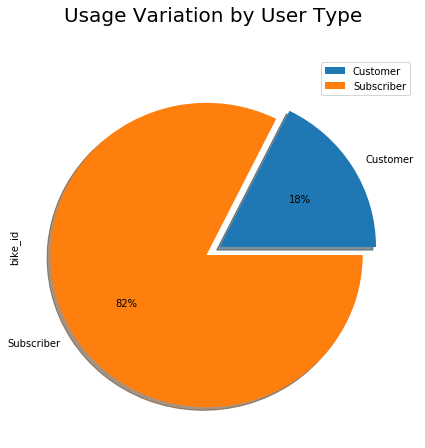

In [44]:
explode = (0, 0.1)
grouped_user_type_df.plot(kind = 'pie', figsize =(7,7), autopct='%1.0f%%', subplots = True, explode = explode, shadow=True, startangle=0)
plt.suptitle('Usage Variation by User Type', size=20)
plt.savefig('User Type Variation.png',bbox_inches='tight')
plt.show()

# Trend of User Type

In [45]:
trend_user = pd.DataFrame(dataset.groupby(['year','month','user_type']).count()['bike_id'])
trend_user = trend_user.unstack(level=2)
#trend_user = trend_user.fillna(value = 0)
trend_user = trend_user['bike_id']

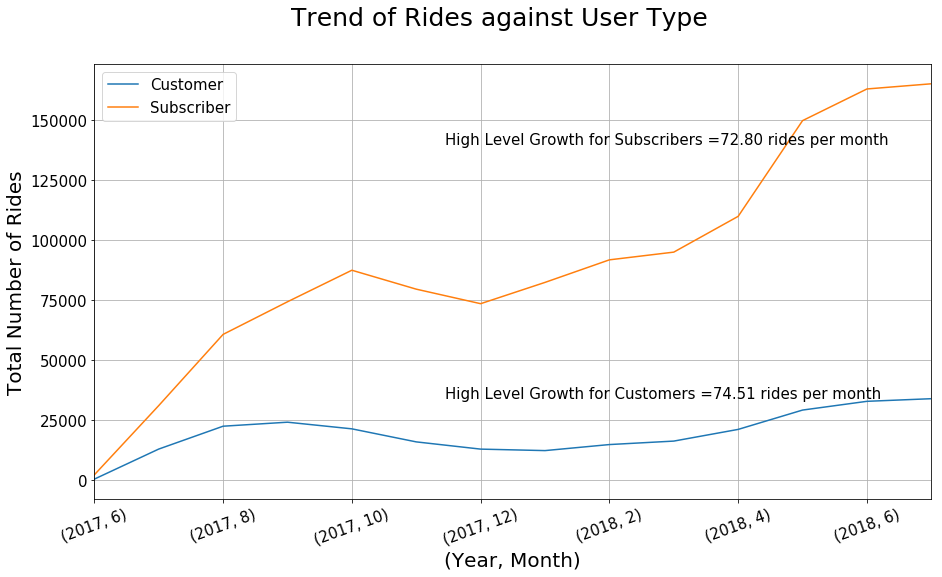

In [46]:
trend_user.plot(kind = 'line', figsize =(15,8))
plt.xticks(rotation=20)
plt.tick_params(labelsize=15)
plt.suptitle('Trend of Rides against User Type', size=25)
plt.xlabel('(Year, Month)', size=20)
plt.ylabel('Total Number of Rides', size=20)
plt.legend(loc='best', prop={'size':15})
plt.grid(True)
plt.figtext(0.45,0.74,'High Level Growth for Subscribers ={0:.2f} rides per month'.format((trend_user['Subscriber'][-1]-trend_user['Subscriber'][0])/trend_user['Subscriber'][0]), size = 15)
plt.figtext(0.45,0.3,'High Level Growth for Customers ={0:.2f} rides per month'.format((trend_user['Customer'][-1]-trend_user['Customer'][0])/trend_user['Customer'][0]), size = 15)

plt.savefig('Trend of User Type.png',bbox_inches='tight')
plt.show()

# Member's Age

In [47]:
member_birth_year = pd.DataFrame(dataset.groupby(['age']).count()['bike_id']).reset_index()
member_birth_year.columns = ['age', 'Count']
member_birth_year['age'] = member_birth_year[['age']].astype(int)

In [48]:
## Assuming that Member's Age above 90 to be Data Entry error or Outliers
## Remove all such errors & Outliers (age above 80) for easy visualizaion 
member_birth_year = member_birth_year.query('age<=80')

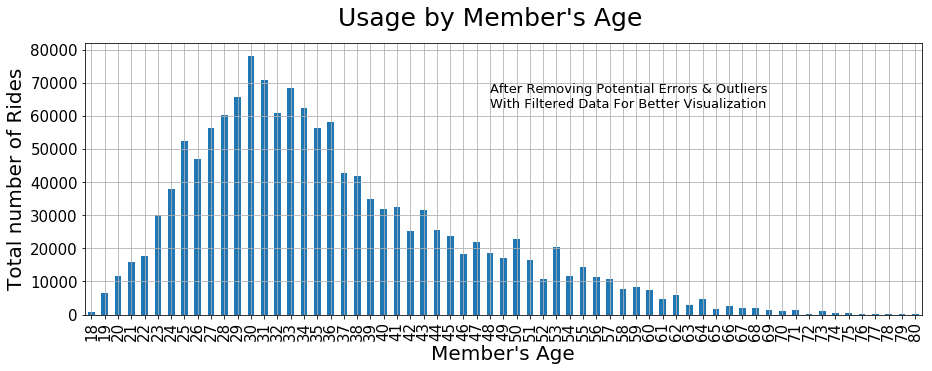

In [50]:
member_birth_year.plot(x = 'age', y = 'Count', kind='bar',legend = None, figsize =(15,5)) 
plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.suptitle('Usage by Member\'s Age', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Member\'s Age', size=20)

plt.grid(True)
plt.figtext(0.5,0.7,'After Removing Potential Errors & Outliers\nWith Filtered Data For Better Visualization', size = 13)
plt.savefig('Usage by Member\'s Age.png',bbox_inches='tight')
plt.show()

# Number of Short Rides, Mid & Long Rides based on duration

In [51]:
dataset['duration_bucket'] = ['  0-15min' if x < 900 else '  15-30min' if x < 1800 else '  30-60min' if x < 3600 else ' 1-3hr' if x < 10800 else ' 3-6hr' if x < 21600 else ' 6-10hr' if x < 36000 else '10hr & above' for x in dataset['duration_sec']]

In [52]:
duration_buckets_no_Rides = pd.DataFrame(dataset.groupby(['duration_bucket']).count()['bike_id'])

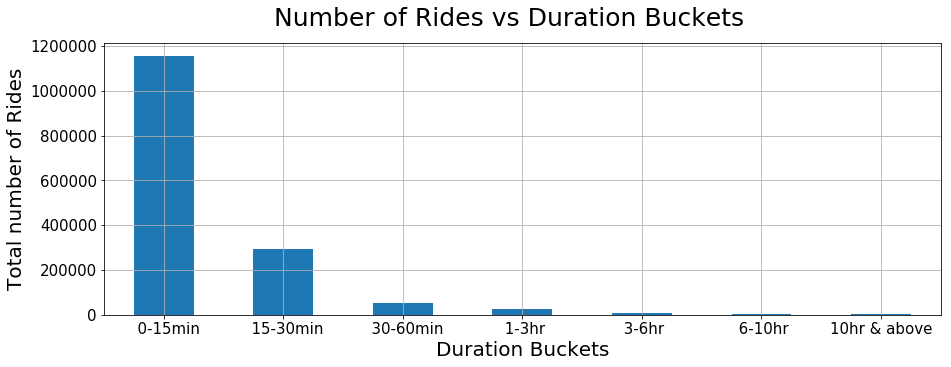

In [53]:
duration_buckets_no_Rides.plot(kind='bar',legend = None, figsize =(15,5)) 
plt.xticks(rotation=0)
plt.tick_params(labelsize=15)
plt.suptitle('Number of Rides vs Duration Buckets', size=25)
plt.ylabel('Total number of Rides', size=20)
plt.xlabel('Duration Buckets', size=20)
plt.grid(True)
plt.savefig('Number of Rides vs Duration Buckets.png',bbox_inches='tight')
plt.show()

# Total Duration of Short, Mid & Long Rides

In [54]:
duration_buckets_duration = pd.DataFrame(dataset.groupby(['duration_bucket']).sum()['duration_sec'])

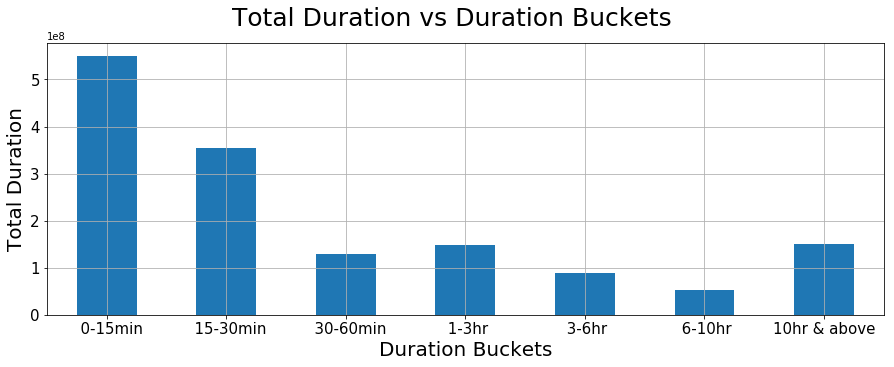

In [55]:
duration_buckets_duration.plot(kind='bar',legend = None, figsize =(15,5)) 
plt.xticks(rotation=0)
plt.tick_params(labelsize=15)
plt.suptitle('Total Duration vs Duration Buckets', size=25)
plt.ylabel('Total Duration', size=20)
plt.xlabel('Duration Buckets', size=20)
plt.grid(True)
plt.savefig('Total Duration vs Duration Buckets.png',bbox_inches='tight')
plt.show()

# Displacement Distribution 
### The shortest distance between Start Station & End Station

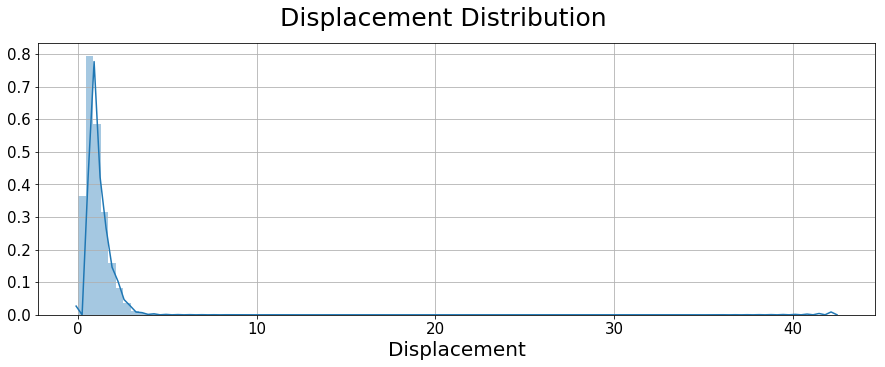

In [56]:
try:
    plt.figure(figsize=(15,5))
    sns.distplot(dataset['Displacement'], bins = 100)
    plt.xticks(rotation=0)
    plt.tick_params(labelsize=15)
    plt.suptitle('Displacement Distribution', size=25)
    plt.xlabel('Displacement', size=20)
    plt.grid(True)
    plt.savefig('Displacement Distribution.png',bbox_inches='tight')
    plt.show()
except:
    print('Oops...Looks like you skipped adding Displacement Column...Let\'s move on to the next one...')

# Gender vs UserType Usage in terms of Total Duration

In [57]:
gender_usertype_duration = pd.DataFrame(dataset.groupby(['member_gender', 'user_type']).sum()['duration_sec']).reset_index()

In [58]:
gender_usertype_duration['color'] = pd.DataFrame([1100,500,1787,2764,1500,2000,2682,1500])

In [59]:
gender_usertype_duration['duration_hr'] = gender_usertype_duration['duration_sec']/3600
gender_usertype_duration['duration_hr'] = gender_usertype_duration['duration_hr'].round(2)

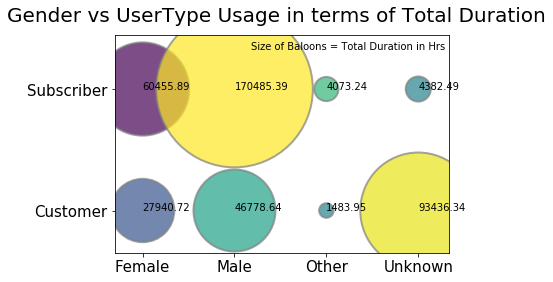

In [60]:
S = gender_usertype_duration["duration_sec"]/25000

fig, ax = plt.subplots()

ax.scatter(gender_usertype_duration["member_gender"], gender_usertype_duration["user_type"], s=S,c=gender_usertype_duration["color"], marker='o',alpha=0.7,linewidths=2, edgecolor='grey')

plt.xticks(rotation=0)
plt.tick_params(labelsize=15)

for i, txt in enumerate(gender_usertype_duration["duration_hr"]):
    ax.annotate(txt, (gender_usertype_duration["member_gender"][i], gender_usertype_duration["user_type"][i]))
plt.suptitle('Gender vs UserType Usage in terms of Total Duration', size=20)
plt.figtext(0.44,0.83,'Size of Baloons = Total Duration in Hrs')
plt.savefig('Gender vs UserType Usage in terms of Total Duration.png',bbox_inches='tight')

plt.show()

# StoryTelling

# Trend Patterns - High-Level Dashboard

#### This is a high level Trend Patterns for the Management. 
#### The first 3 patterns show the overall growth patterns on daily bases & monthly bases in terms of Total Number of Rides & Total Duration. In the first plot, we can observe growth in trend, with the weekends hitting the business. In 2nd & 3rd plot, we observe the continuous growth, with seasonality hitting the growth pattern during winter season. 
#### Finally, the HeatMap shows the popular or busy time of the day & even day of the week. The peak hours being 7:00 am to 10:00 am & 4:00 pm to 7:00 pm, they are only during the WeekDays. This gives us the hint that, during the peak hours many customers use Ford GoBikes to commute to their work. But further analysis shows that the Average Trip Duration is concentrated towards the mean of 16 minutes & standard deviation being 48 minutes. With this we can conclude that most of the commuters use Ford GoBike to commute to the nearest locations such as from train station to their office location. 
### Recommendations - 
#### 1- For Customers, we can charge more cost during the peak time for a single ride than for the regular times.  Given a relation between Customer behaviour upon adding cost price, we can use optimization algorithms & maximize the revenue for the company & retaining customers at the same time. (This applies to customers only, not for subscribers)
#### 2- We need to work on providing some promotional benefits during winter season, to avoid the mentioned seasonality. We can use similar optimization algorithms given the customer behavior upon provided promotional benefits. 
#### For the mentioned recommendations, we need to observe & formulate customer behhavior, & then optimize the business as  mentioned above.

In [86]:
images = ['Number of Rides per Day.png', 'Total Duration per Month.png','Total Number of Rides by Month.png', 'Heatmap.png', 'Trip Duration Distribution.png']#,
#         'Total Number of Rides by Time of the Day.png', 'Total Number of Rides by Days of the Week.png']

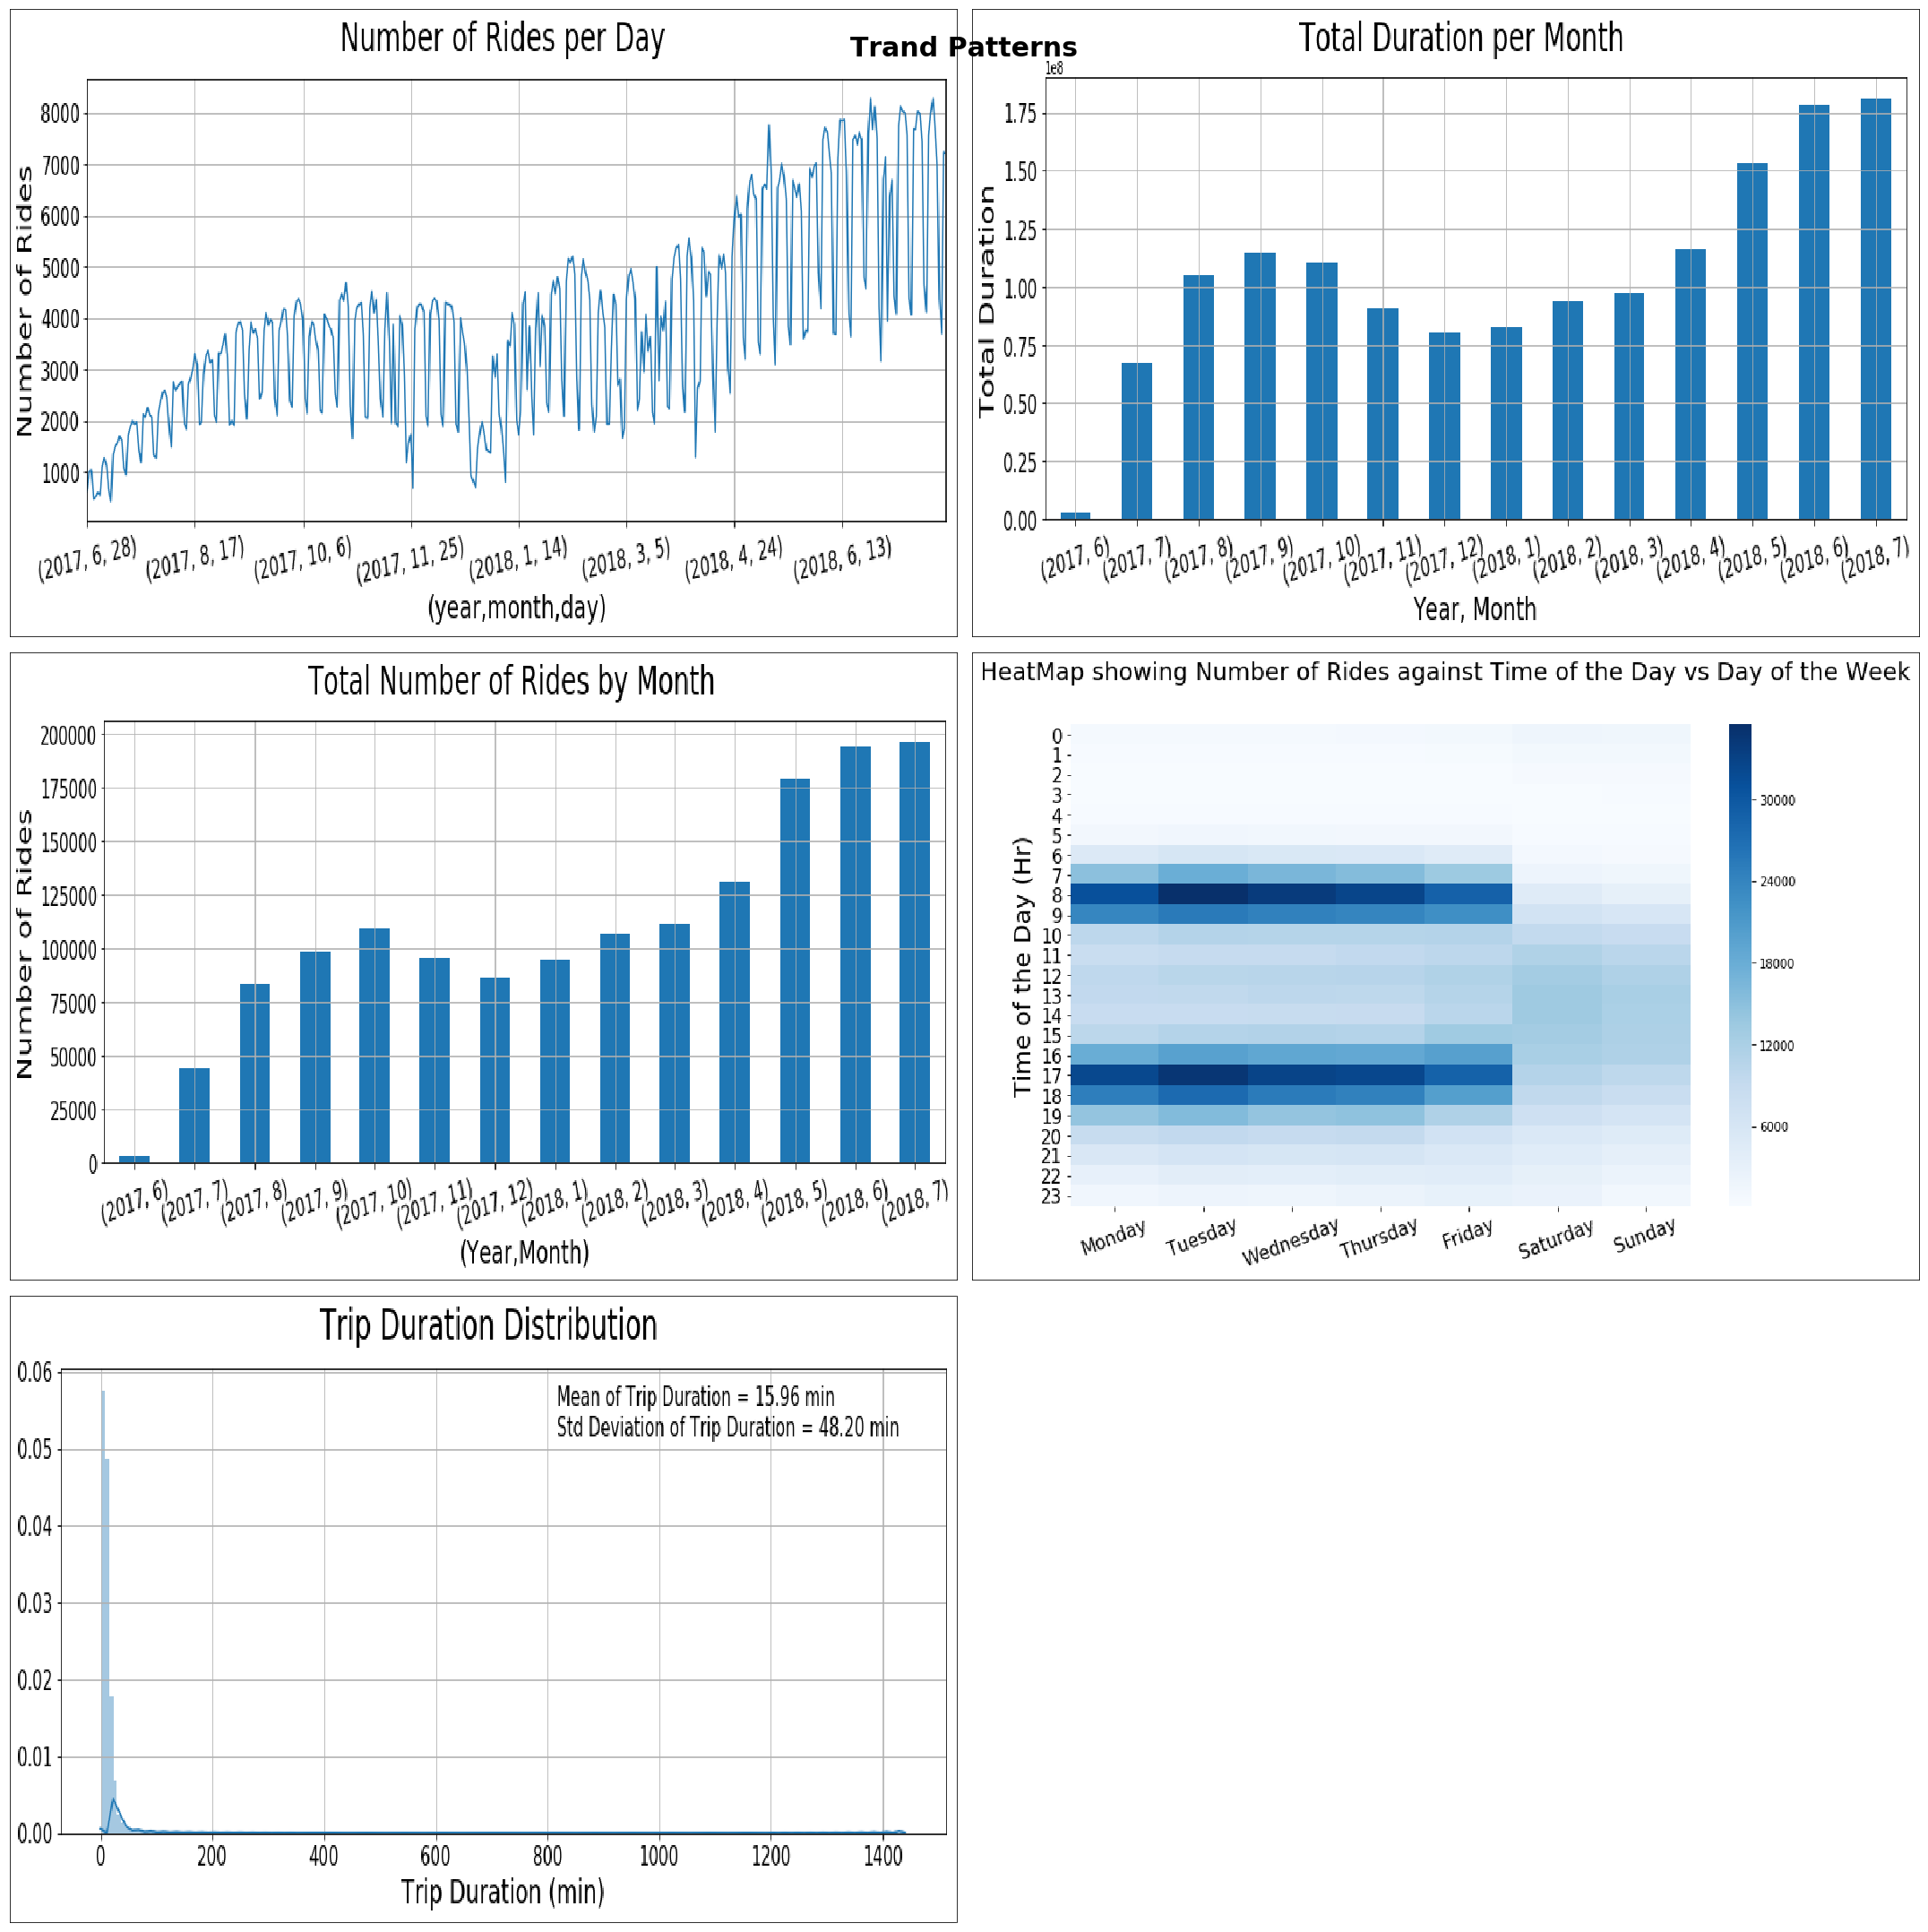

In [88]:
figure(num=None,figsize=(30, 30))
plt.suptitle('Trand Patterns', size = 30, fontweight='bold')
for i in range(len(images)):
    #for j in range(2):
    img = cv2.imread(images[i],1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.tight_layout()
    plt.subplot(321+i)
    plt.imshow(img, aspect='auto')
    plt.yticks([])
    plt.xticks([])
plt.savefig('Trend Patterns.png')
plt.show()

# Station Utilization

#### This dashboard tells about our Station Utilization. These graphs show some of the top busy stations & least busy stations. 
#### If we further study the station location we observe that many of the busy stations are either near to the Bay water or Train Station. And it is the other way around for the non-busy stations.  
#### The last plot here shows Popular Combinations of Stations. Most of these are beside the Bay water. So users hang out beside the Bay Water, somewhere between Golden Gate Bridge and San-Fransisco-Okland Bay Bridge. Train station are common also, but do not come under popular combinations as the users spread out to multiple work locations as they take bike from a Train Station. 
# Recommendations-
#### 1- When Ford GoBike is planning on expanding it's business to other states, this data is highly important. Understand what types of locations are popular & what are the potential customers. Based on this Ford GoBike can decide on station locations & the target market. 
### 2- Further analysis could be Network Balancing to serve Users better and maximize the profit for the company. As the users pick bikes from one location & drop it at another, it requires a lot of efforts in Handeling the Network. If a station has a capacity of 10 bikes, and if a user wants to drop a bike, but what if there is not space remaining on the station??? If a user wants a bike from station 'A', and there are no bikes available at the station??? So given some more time, we can create an algorithm that helps us handle this network at its best. But to start of with, we can use these graphs to optimize the netowrk to certain extent. We know the peak timings are 7:00am to 10:00 am & 4:00 pm  to 7:00pm. We also know the top busy stations & least busy stations. So during the peak time, we can keep a lot of bikes available near these top busy stations than the least busy stations. 
#### 3- We can also offer some promotional benefits on least busy stations to attract some market there. And upon given some financial information, we can further analyze if these non-busy stations have the potential to make profit for the company and hence decide on keeping or removing the stations. 

In [93]:
images = ['Top 20 Start Stations of all time - Busy Stations.png', 'Top 20 End Stations of all time- Busy Stations.png',
          'Bottom 20 Start Stations of all time - Busy Stations.png', 'Bottom 20 End Stations of all time- Busy Stations.png',
         'Top 20 Start Station - End Station Combo.png']

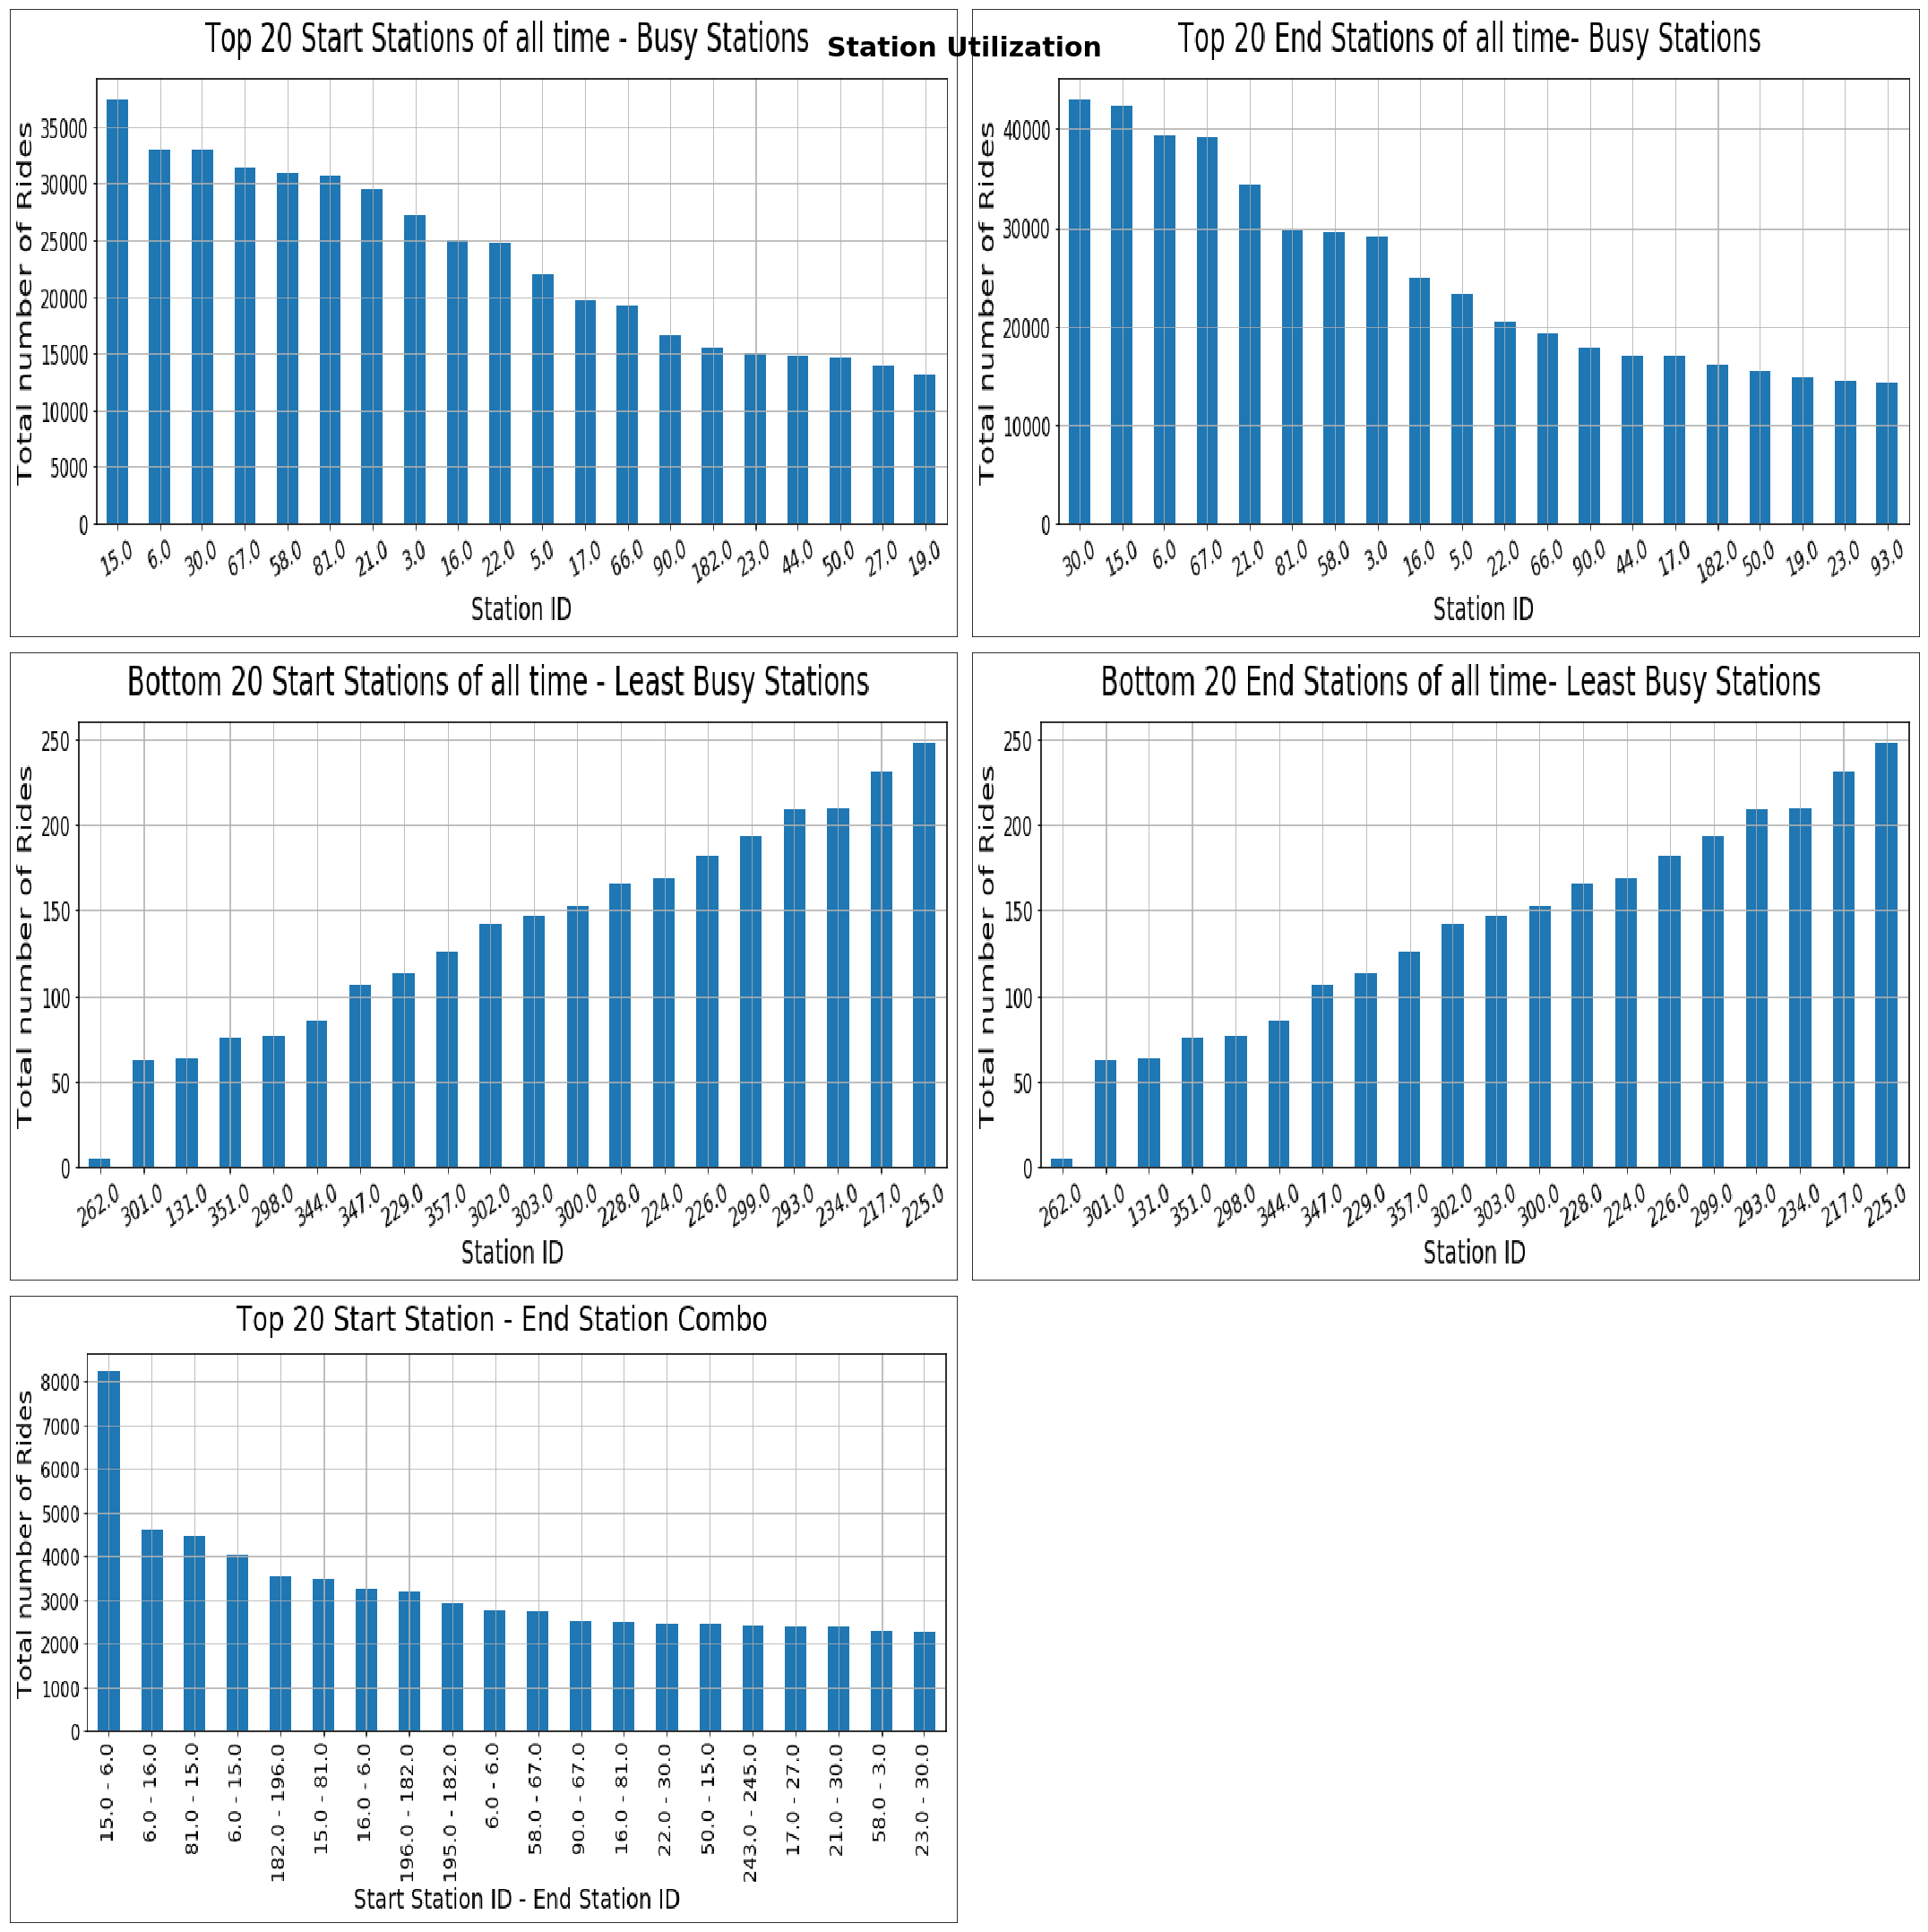

In [94]:
figure(num=None,figsize=(30, 30))
plt.suptitle('Station Utilization', size = 30, fontweight='bold')
for i in range(len(images)):
    #for j in range(2):
    img = cv2.imread(images[i],1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.tight_layout()
    plt.subplot(321+i)
    plt.imshow(img, aspect='auto')
    plt.yticks([])
    plt.xticks([])
plt.savefig('Station Utilization.png')
plt.show()

# Understand your Customers & Target your Market

#### Understanding the Users takes Targeted Marketing way ahead. This dashboard tells about our Users. 
#### The first 2 plots informs us about the gender of our customers. It is weird that, California having more Female population than Male the Genderwise Usage Variation shows that 68% of the rides have been used my Males to that of 22% by Females. (https://www.states101.com/gender-ratios/california) Although the overall growth rate for females is higher; there is a huge scope for gaining more female users. 
#### The next 2 plots explain about Usage variation by User Type. Subscribers use our service more than regular customers. California definitely has a good tourist market, hence we need to work on attracting tourists to use Ford GoBike services. 
#### If we look at the Usage variation by Member's Age, we see that Users are mostly from range of Age 25 to 35. Although there is potential market with Age between 35 & 100; Age group between 18 to 25 are our potential future market. 
#### The last graph shows that male subscribers as well as customers use Ford GoBike service more compared to that of Female and Other genders. 
## Recommendations-
#### 1- As mentioned before, a huge portion of Usage being done by commutors like from Rail Station to their office; it is hard to gain Female customers due to their attire for their work making it uncomfortable for the bike rides. If we can overcome this obstacle in some way, that would raise our users to a new level. 
#### 2- Given further information about Subscribers & Customers including User_ID, their permanent address & more we can draw further conclusions. Depening on who gives more profit for the company, we can put more efforts in marketing or promotional benefits accordingly. 
#### 3- Concentrating more on out potential future market (Age Group 18-25, & possibly 35-40) can help growing our market reach. 

In [65]:
images = ['Genderwise Usage Variation.png', 'Trend of Genderwise Users.png',
          'User Type Variation.png', 'Trend of User Type.png', 'Usage by Member\'s Age.png',
          'Gender vs UserType Usage in terms of Total Duration.png']#'Total Duration vs Duration Buckets.png']

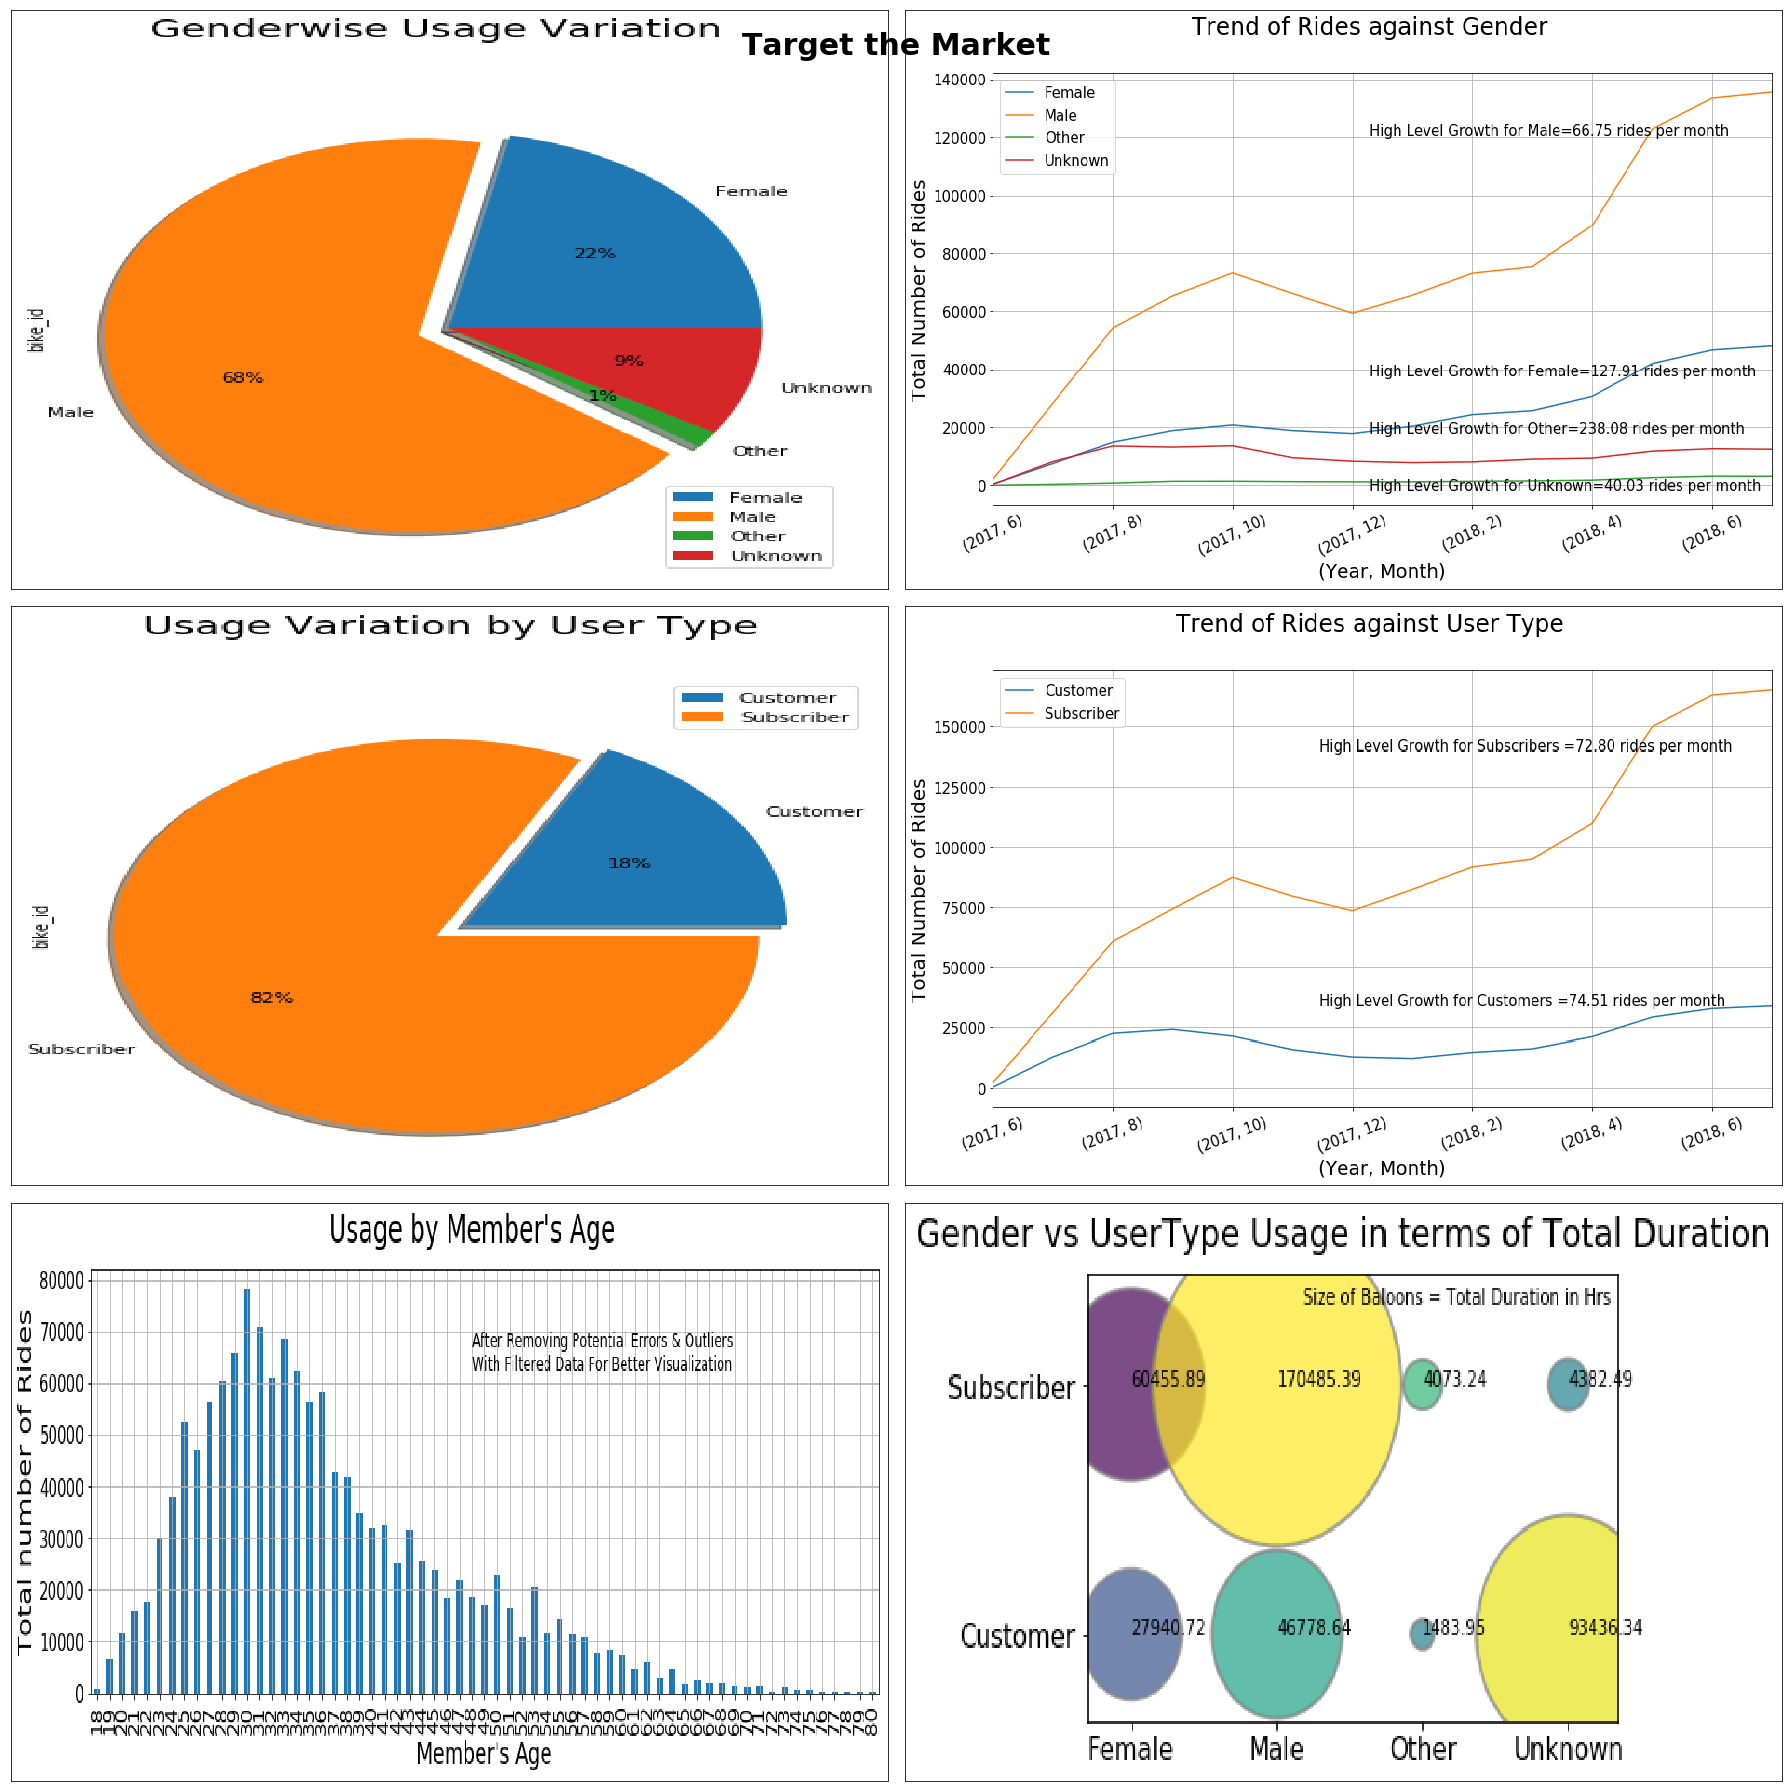

In [66]:
figure(num=None,figsize=(25, 25))
plt.suptitle('Target the Market', size = 30, fontweight='bold')
for i in range(len(images)):
    #for j in range(2):
    img = cv2.imread(images[i],1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.tight_layout()
    plt.subplot(321+i)
    plt.imshow(img, aspect='auto')
    plt.yticks([])
    plt.xticks([])
plt.savefig('Target the Market.png')
plt.show()

# Further Ideas

#### 1- Churn Rate/Potential Bike Repair Needed- If a customer takes a bike from station 'A' and returns it back with a span of 0 to 3 minutes to the same station or the nearest station (displacement as calculated in the script), then it is a prime suspect. Is it because the bike requires some maintenance  service? Or is it because the user did not like our service. We can build a Churn Model using Machine Learning Algorithm to predict the churn rate. Also, we can conduct further analysis to understand the reason for churning. 
#### 2- Network Balancing - Further analysis could be Network Balancing to serve Users better and maximize the profit for the company. As the users pick bikes from one location & drop it at another, it requires a lot of efforts in Handling the Network. If a station has a capacity of 10 bikes, and if a user wants to drop a bike, but what if there is not space remaining on the station??? If a user wants a bike from station 'A', and there are no bikes available at the station??? So given some more time, we can create an algorithm that helps us handle this network at its best. But to start off with, we can use these graphs to optimize the network to certain extent. We know the peak timings are 7:00am to 10:00 am & 4:00 pm to 7:00pm. We also know the top busy stations & least busy stations. So during the peak time, we can keep a lot of bikes available near these top busy stations than the least busy stations.
#### 3- IOTs- With users permission, if can obtain the usage of bike including the distance travelled, or locations visited using an IOT system, we can further analyze the customer behavior & improve our business model. 
#### 4- Per User Analysis - Given further information about Subscribers & Customers including User_ID, their permanent address & more we can draw further conclusions. Depending on who gives more profit for the company, we can put more efforts in marketing or promotional benefits accordingly. 
#### 5- Money - Given further information about Subscribers & Customers including User_ID, monthly or annual subscription, date of subscription and more, we can conduct further analysis on revenue made till the date, or by month and more.